## Descarga conjunto de datos

In [1]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar xzf cifar-10-python.tar.gz

--2022-09-13 18:56:05--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.9MB/s    in 6.1s    

2022-09-13 18:56:11 (26.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



## 1.- Procesar datos

In [2]:
import numpy as np

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar = unpickle('cifar-10-batches-py/data_batch_1')

In [4]:
full_img = np.zeros((50000,32,32,3), dtype=np.uint8)
full_label = np.zeros((50000,), dtype=int)

def rgb_to_image(batch):
    cifrar = unpickle('cifar-10-batches-py/data_batch_' + str(batch))
    full_label[(batch-1) *10000: batch *10000] = cifrar[b'labels']
    for i in range(10000):
        for j in range(32):
            for k in range(32):
                full_img[10000 * (batch-1) + i][j][k] = [cifrar[b'data'][i][1024*x+32*j+k] for x in range(3)]
        if i % 1000 == 0:
            print(i+1000, end = '; ')

In [5]:
for batch in range(5):
    print("Batch: " + str(batch+1))
    rgb_to_image(batch+1)
    print()

Batch: 1
1000; 2000; 3000; 4000; 5000; 6000; 7000; 8000; 9000; 10000; 
Batch: 2
1000; 2000; 3000; 4000; 5000; 6000; 7000; 8000; 9000; 10000; 
Batch: 3
1000; 2000; 3000; 4000; 5000; 6000; 7000; 8000; 9000; 10000; 
Batch: 4
1000; 2000; 3000; 4000; 5000; 6000; 7000; 8000; 9000; 10000; 
Batch: 5
1000; 2000; 3000; 4000; 5000; 6000; 7000; 8000; 9000; 10000; 


- Guardar arreglo en pickle con la siguiente forma en formato .pkl

In [6]:
import pickle
with open('full_img.pkl', 'wb') as fid:
     pickle.dump(full_img, fid)

with open('full_label.pkl', 'wb') as fid:
     pickle.dump(full_label, fid)
     
full_img.shape, full_label.shape

((50000, 32, 32, 3), (50000,))

## 2.- Leer datos y visualizar imágenes
- Leer archivos .pkl

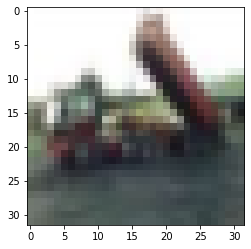

In [7]:
with open('full_img.pkl', 'rb') as fid:
     data = pickle.load(fid)

with open('full_label.pkl', 'rb') as fid:
     labels = pickle.load(fid)

from matplotlib import pyplot as plt
plt.imshow(data[2])
plt.show()

- Guardar imágen en png con resolución 432 x 432

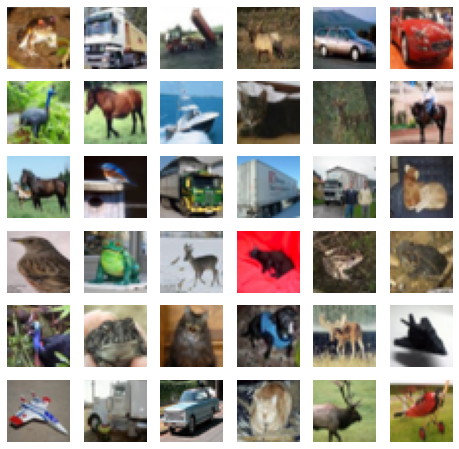

In [8]:
# create figure
fig = plt.figure(figsize=(8, 8))

for i in range(36):
    # Adds a subplot at the 1st position
    fig.add_subplot(6, 6, i+1)

    # showing image
    plt.imshow(data[i])
    plt.axis('off')

plt.savefig('foo1.png')

- Plotear con sus respectivas etiquetas y guardar en png con resolución 432 x 432

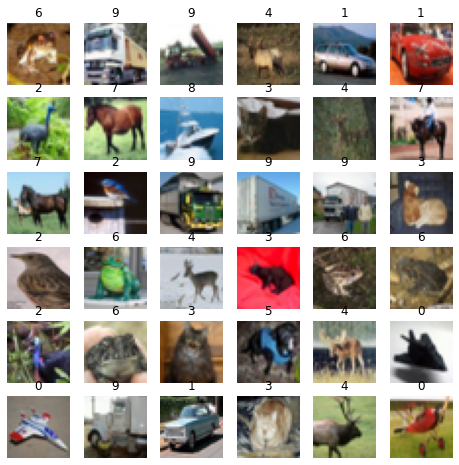

In [9]:
# create figure
fig = plt.figure(figsize=(8, 8))

for i in range(36):
    # Adds a subplot at the 1st position
    fig.add_subplot(6, 6, i+1)

    # showing image
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(labels[i])

plt.savefig('foo2.png')
  

## 3.- Procesar multiples archivos
- Procesar los txt de la carpeta train

In [10]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7471k      0  0:00:10  0:00:10 --:--:-- 16.3M


- Procesar y guardar csv. Leer con pandas y obtener el siguiente resultado.

In [11]:
import pandas as pd
import os

reviews = [""] * 25000
i = 0

for arch in os.listdir('./aclImdb/train/pos/'):
    with open('aclImdb/train/pos/' + arch) as f:
        reviews[i] = f.readlines()[0]
    i += 1

for arch in os.listdir('./aclImdb/train/neg/'):
    with open('aclImdb/train/neg/' + arch) as f:
        reviews[i] = f.readlines()[0]
    i += 1

reviews[8908]

'Michigan, Edgar Allen Poe, a toaster, and a frying pan . . . If you don\'t mind the psycho-thriller or horror film genre, and you have a special place in your heart for the twisted, this is the movie for you. An amazingly well developed first film, "Hatred of a Minute" has all the draw of mainstream hits like "Silence of the Lambs" and of cult classics like "Army of Darkness." The editing and effects are well done, better than many films in the genre. Kallio weaves an intricate tale of torment drawing on both the Bible and Poe\'s writings. At a time when big budget, big name films lack much in the way of substance, the independent film has resurrected this dying trait. If you love Michigan, a good story, or a decent thriller go check out "Hatred of a Minute."'

In [12]:
label = [1] * 12500
label += [0] * 12500

d = {'text':reviews, 'label':label}
df = pd.DataFrame(data=d)
df.head()

,text,label
0,In my opinion this has to be one of Barbara St...,1
1,"Ten years after the first movie, James Belushi...",1
2,"Based on Elmore Leonard, this is a violent and...",1
3,"A friend of mine recommended this movie, citin...",1
4,"""Bell Book and Candle"" was shown recently on c...",1


In [13]:
df.tail()

,text,label
24995,Pictures that usually glorify a hero have mean...,0
24996,Honestly I can't understand why this movie rat...,0
24997,"Rex Reed once said of a movie (""Julia and Juli...",0
24998,I can't believe they got the actors and actres...,0
24999,By 1941 Columbia was a full-fledged major stud...,0
